In [1]:
# import pandas, numpy and matplotlib.pyplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the csv file containing dataset
data = pd.read_csv('GOOG_30min_sample.csv')

In [4]:
# display the dataset
data

timestamp      open    high     low   close  volume
0    2024-08-12 04:00:00  165.5100  165.60  165.45  165.45     498
1    2024-08-12 04:30:00  165.3100  165.31  165.20  165.20     520
2    2024-08-12 05:00:00  165.1400  165.14  164.93  164.93    1471
3    2024-08-12 05:30:00  165.0000  165.00  165.00  165.00    1306
4    2024-08-12 06:30:00  165.3800  165.38  165.29  165.29     475
..                   ...       ...     ...     ...     ...     ...
345  2024-08-26 17:30:00  167.8300  167.83  167.83  167.83     100
346  2024-08-26 18:00:00  167.8572  168.02  167.84  167.91    1430
347  2024-08-26 18:30:00  167.5700  167.73  167.52  167.73    1622
348  2024-08-26 19:00:00  167.7400  167.93  167.74  167.90    2740
349  2024-08-26 19:30:00  167.9100  168.03  167.85  167.93    3546

[350 rows x 6 columns]

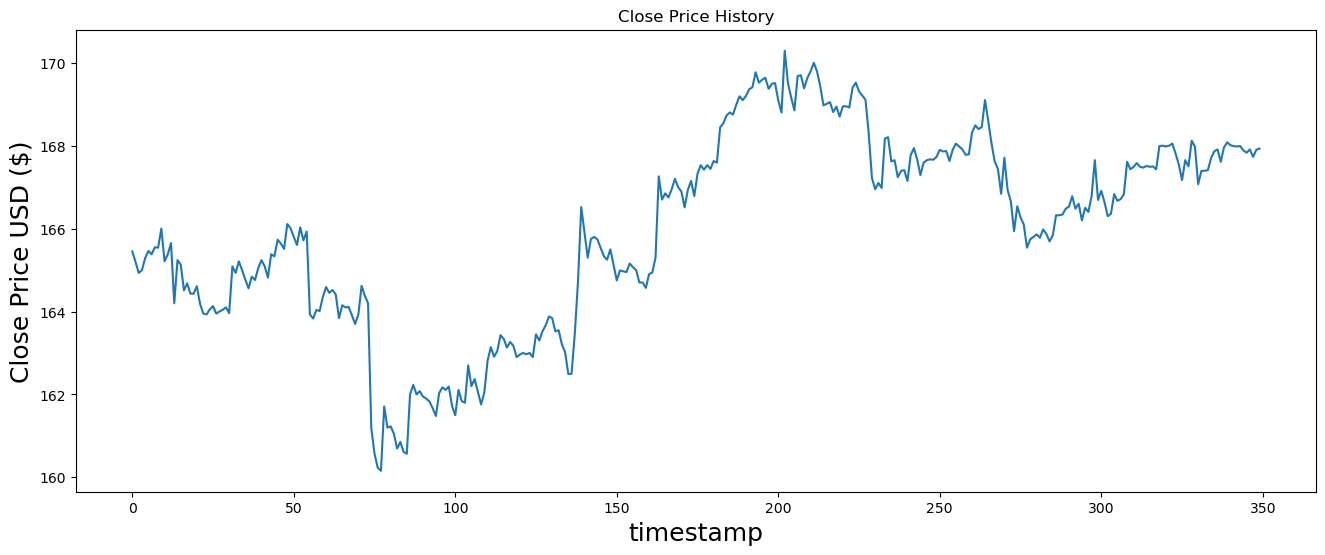

In [5]:
# plot a graph showing the stock's closing price for each timestamp

plt.figure(figsize = (16, 6))
plt.title('Close Price History')
plt.plot(data['close'])
plt.xlabel('timestamp', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [6]:
# filter out the training data from the dataset
# here 95 percent of the dataset is taken as the training data

df = data.filter(['close'])
dataset = df.values
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

333

In [7]:
# normalize the data to a range between 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.52221125],
       [0.49753208],
       [0.47087858],
       [0.47778875],
       [0.50641658],
       [0.52319842],
       [0.51530109],
       [0.53208292],
       [0.53109576],
       [0.57650543],
       [0.49851925],
       [0.51530109],
       [0.54195459],
       [0.3988154 ],
       [0.50148075],
       [0.49062192],
       [0.42941757],
       [0.44619941],
       [0.42152024],
       [0.42152024],
       [0.43928924],
       [0.39684107],
       [0.37413623],
       [0.3721619 ],
       [0.38411649],
       [0.39190523],
       [0.37413623],
       [0.37907206],
       [0.38302073],
       [0.38894373],
       [0.3751234 ],
       [0.48667325],
       [0.47087858],
       [0.49851925],
       [0.47778875],
       [0.45508391],
       [0.43435341],
       [0.46199408],
       [0.45409674],
       [0.48272458],
       [0.50148075],
       [0.48667325],
       [0.46001974],
       [0.51530109],
       [0.51036525],
       [0.54985192],
       [0.54096742],
       [0.528

In [8]:
# create a new training dataset "train_data" that contains the scaled_data

train_data = scaled_data[0:int(training_data_len), :]

x_train = []   
y_train = []

# Split the data into x_train and y_train data sets

for i in range(31, len(train_data)):
    x_train.append(train_data[i-31:i , 0])
    y_train.append(train_data[i, 0])
    if i <= 32:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# x_train.shape    

[array([0.52221125, 0.49753208, 0.47087858, 0.47778875, 0.50641658,
       0.52319842, 0.51530109, 0.53208292, 0.53109576, 0.57650543,
       0.49851925, 0.51530109, 0.54195459, 0.3988154 , 0.50148075,
       0.49062192, 0.42941757, 0.44619941, 0.42152024, 0.42152024,
       0.43928924, 0.39684107, 0.37413623, 0.3721619 , 0.38411649,
       0.39190523, 0.37413623, 0.37907206, 0.38302073, 0.38894373,
       0.3751234 ])]
[0.4866732477788762]

[array([0.52221125, 0.49753208, 0.47087858, 0.47778875, 0.50641658,
       0.52319842, 0.51530109, 0.53208292, 0.53109576, 0.57650543,
       0.49851925, 0.51530109, 0.54195459, 0.3988154 , 0.50148075,
       0.49062192, 0.42941757, 0.44619941, 0.42152024, 0.42152024,
       0.43928924, 0.39684107, 0.37413623, 0.3721619 , 0.38411649,
       0.39190523, 0.37413623, 0.37907206, 0.38302073, 0.38894373,
       0.3751234 ]), array([0.49753208, 0.47087858, 0.47778875, 0.50641658, 0.52319842,
       0.51530109, 0.53208292, 0.53109576, 0.57650543, 0.498519

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#train the model upto 10 epochs(depending upon the loss)

model.fit(x_train, y_train, batch_size= 1, epochs = 10)

Epoch 1/10
302/302 [==============================] - 8s 13ms/step - loss: 0.0118
Epoch 2/10
302/302 [==============================] - 4s 13ms/step - loss: 0.0067
Epoch 3/10
302/302 [==============================] - 4s 13ms/step - loss: 0.0054
Epoch 4/10
302/302 [==============================] - 4s 14ms/step - loss: 0.0042
Epoch 5/10
302/302 [==============================] - 4s 13ms/step - loss: 0.0039
Epoch 6/10
302/302 [==============================] - 4s 13ms/step - loss: 0.0030
Epoch 7/10
302/302 [==============================] - 4s 13ms/step - loss: 0.0030
Epoch 8/10
302/302 [==============================] - 4s 14ms/step - loss: 0.0032
Epoch 9/10
302/302 [==============================] - 4s 14ms/step - loss: 0.0036
Epoch 10/10
302/302 [==============================] - 4s 13ms/step - loss: 0.0028


In [10]:
#create a testing data set
test_data = scaled_data[training_data_len - 31:, :]

#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(31, len(test_data)):
    x_test.append(test_data[i-31:i, 0])

#convert the data into a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#store the model's predicted prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions- y_test) ** 2)))
rmse
#root mean square error(rmse)

1/1 [==============================] - 1s 956ms/step


0.15654466601971592

C:\Users\sachin singh\AppData\Local\Temp\ipykernel_15264\313226173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted close'] = predictions


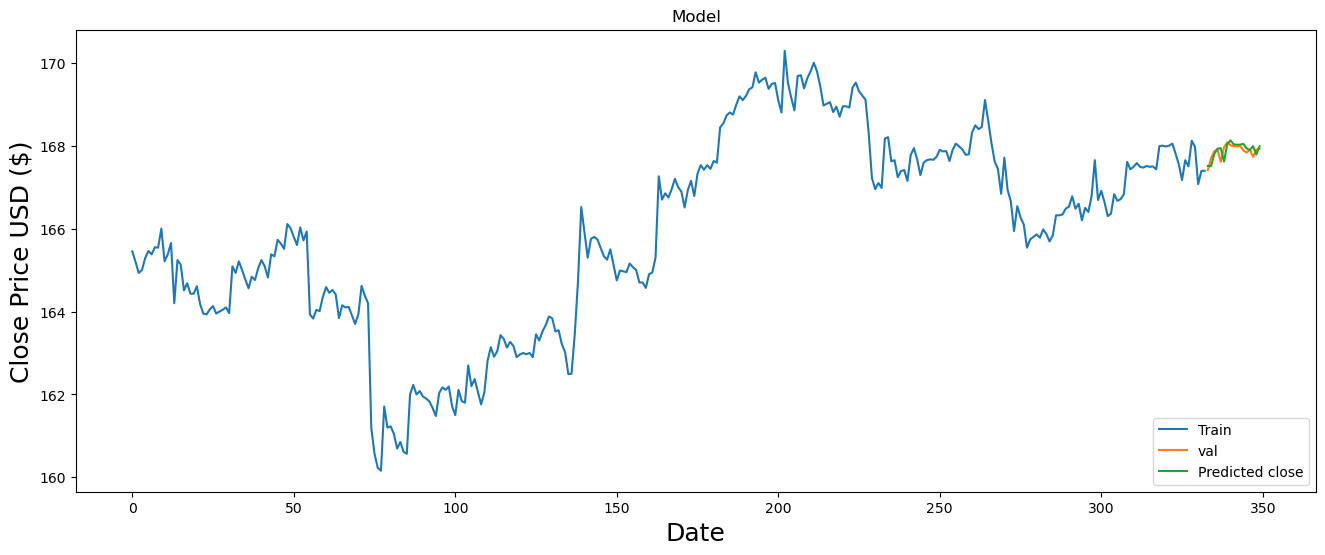

In [11]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted close'] = predictions

plt.figure(figsize = (16,6))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predicted close']])
plt.legend(['Train', 'val', 'Predicted close'], loc='lower right')
plt.show()

In [12]:
#show the prediced closing value
valid

timestamp      open      high       low    close   volume  \
333  2024-08-26 11:30:00  167.3900  167.8250  167.3486  167.410   322832   
334  2024-08-26 12:00:00  167.3900  167.7500  167.2200  167.700   261610   
335  2024-08-26 12:30:00  167.7400  167.9400  167.7300  167.865   169900   
336  2024-08-26 13:00:00  167.8700  168.1400  167.7600  167.910   204224   
337  2024-08-26 13:30:00  167.9100  168.0801  167.4800  167.610   225072   
338  2024-08-26 14:00:00  167.6000  168.0250  167.5300  167.960   220787   
339  2024-08-26 14:30:00  167.9600  168.3089  167.9400  168.080   216056   
340  2024-08-26 15:00:00  168.0800  168.1500  167.9000  168.010   268951   
341  2024-08-26 15:30:00  168.0300  168.1100  167.6400  167.990   848694   
342  2024-08-26 16:00:00  167.9900  168.0000  167.9300  167.980  1098010   
343  2024-08-26 16:30:00  167.9800  168.0000  167.9600  167.990     1830   
344  2024-08-26 17:00:00  167.9400  168.0000  167.8300  167.886     1007   
345  2024-08-26 17:30:00  167.8300  167.8300  167.8300  167.830      100   
346  2024-08-26 18:00:00  167.8572  168.0200  167.8400  167.910     1430   
347  2024-08-26 18:30:00  167.5700  167.7300  167.5200  167.730     1622   
348  2024-08-26 19:00:00  167.7400  167.9300  167.7400  167.900     2740   
349  2024-08-26 19:30:00  167.9100  168.0300  167.8500  167.930     3546   

     Predicted close  
333       167.509613  
334       167.510635  
335       167.800049  
336       167.925720  
337       167.938705  
338       167.615692  
339       168.035446  
340       168.127991  
341       168.031448  
342       168.022720  
343       168.024384  
344       168.043198  
345       167.934860  
346       167.892670  
347       167.988388  
348       167.785294  
349       167.986588

                         open      high       low    close   volume  \
timestamp                                                             
2024-08-26 11:30:00  167.3900  167.8250  167.3486  167.410   322832   
2024-08-26 12:00:00  167.3900  167.7500  167.2200  167.700   261610   
2024-08-26 12:30:00  167.7400  167.9400  167.7300  167.865   169900   
2024-08-26 13:00:00  167.8700  168.1400  167.7600  167.910   204224   
2024-08-26 13:30:00  167.9100  168.0801  167.4800  167.610   225072   
2024-08-26 14:00:00  167.6000  168.0250  167.5300  167.960   220787   
2024-08-26 14:30:00  167.9600  168.3089  167.9400  168.080   216056   
2024-08-26 15:00:00  168.0800  168.1500  167.9000  168.010   268951   
2024-08-26 15:30:00  168.0300  168.1100  167.6400  167.990   848694   
2024-08-26 16:00:00  167.9900  168.0000  167.9300  167.980  1098010   
2024-08-26 16:30:00  167.9800  168.0000  167.9600  167.990     1830   
2024-08-26 17:00:00  167.9400  168.0000  167.8300  167.886     1007   
2024-0

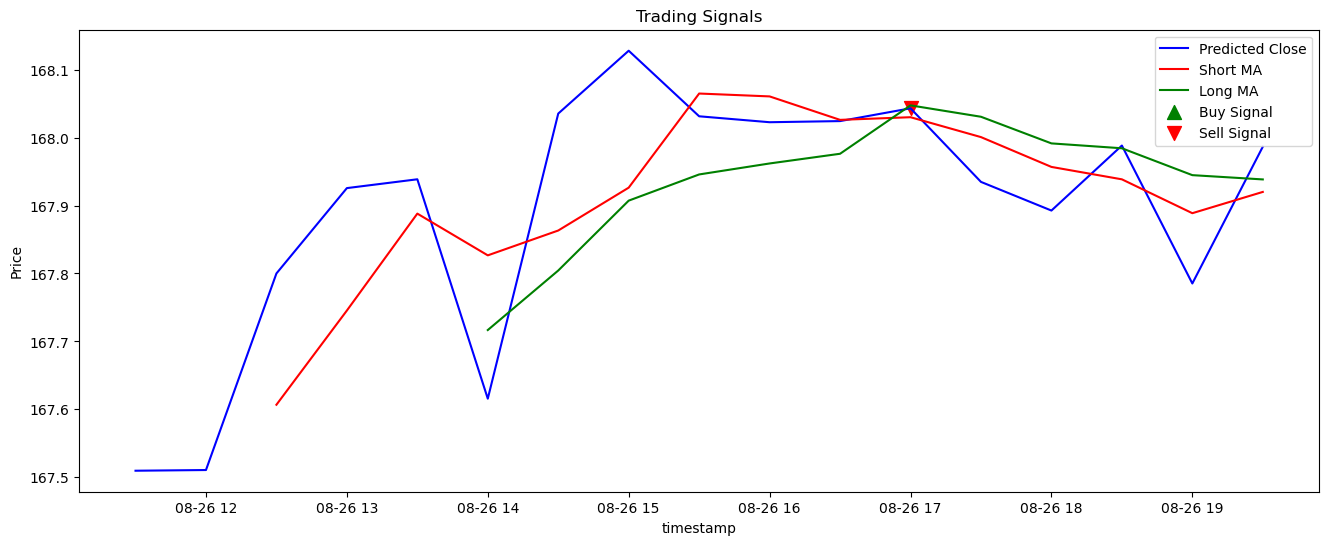

In [14]:
# Create DataFrame
df = pd.DataFrame(valid)

# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Calculate short-term and long-term moving averages
short_window = 3  # Adjust as needed
long_window = 6   # Adjust as needed

df['Short_MA'] = df['Predicted close'].rolling(window=short_window).mean()
df['Long_MA'] = df['Predicted close'].rolling(window=long_window).mean()

# Initialize signals
df['Signal'] = 0  # 0: Hold, 1: Buy, -1: Sell

# Generate trading signals
for i in range(1, len(df)):
    if not pd.isna(df['Short_MA'].iloc[i]) and not pd.isna(df['Long_MA'].iloc[i]) and \
       df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i] and \
       df['Short_MA'].iloc[i-1] <= df['Long_MA'].iloc[i-1]:
        df.at[df.index[i], 'Signal'] = 1  # Buy
    elif not pd.isna(df['Short_MA'].iloc[i]) and not pd.isna(df['Long_MA'].iloc[i]) and \
         df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i] and \
         df['Short_MA'].iloc[i-1] >= df['Long_MA'].iloc[i-1]:
        df.at[df.index[i], 'Signal'] = -1  # Sell
    else:
        df.at[df.index[i], 'Signal'] = 0  # Hold

# Print the DataFrame with signals
print(df)

# Plot the data for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(df['Predicted close'], label='Predicted Close', color='blue')
plt.plot(df['Short_MA'], label='Short MA', color='red')
plt.plot(df['Long_MA'], label='Long MA', color='green')
plt.scatter(df.index[df['Signal'] == 1], df['Predicted close'][df['Signal'] == 1], marker='^', color='g', label='Buy Signal', s=100)
plt.scatter(df.index[df['Signal'] == -1], df['Predicted close'][df['Signal'] == -1], marker='v', color='r', label='Sell Signal', s=100)
plt.title('Trading Signals')
plt.xlabel('timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()
